## Gathering Data

We will be gathering data from three different sources:
1. Download twitter-archive-enhanced.csv file manually and then reading into dataframe df.
2. Download image-predictions.tsv file programmatically from Udacity's servers through url provided using Requests library and then read into dataframe image_predictions.
3. Using tweet_ids to query Twitter API, we download JSON data for each tweet in a file named tweet_json.txt. The file is then read line by line to extract necessary data such as tweet_id,retweet_count and favorite_count into dataframe tweet_json_df

In [1321]:
#Import packages
import pandas as pd
import numpy as np
import requests
import os

#Reading downloaded file into dataframe
twitter_archive_df = pd.read_csv('/Users/mkarkhan/anaconda2/twitter-archive-enhanced.csv')
twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [1322]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
# Use requests library to get file from url link
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode ='wb') as file:
                                             file.write(response.content)

In [1323]:
# Reading image-predictions.tsv file into a new dataframe
image_predictions_df = pd.read_csv('/Users/mkarkhan/anaconda2/image_predictions/image-predictions.tsv', sep='\t')

In [1324]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1673,813127251579564032,https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg,1,Norwegian_elkhound,0.432416,True,whippet,0.374223,True,Siberian_husky,0.032463,True
1124,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/887343120832229379/pu/img/6HSuFrW1lzI_9Mht.jpg,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
2002,876838120628539392,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True


In [9]:
# Importing tweepy package
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
import json
import sys
import time

start = time.time()
file = open("tweet_json.txt","w")
for id in df.tweet_id:
    try:
        tweet_status = api.get_status(id, tweet_mode='extended')
        tweet_status_json = json.dumps(tweet_status._json)
        file.write(tweet_status_json +'\n')
        print('Tweet processed {}'.format(id))
    except:
        e = sys.exc_info()[0]
        print('Unable to process tweet {} because of error {}'.format(id,e))
        tweet_status = {"id" : id}
        tweet_status_json = json.dumps(tweet_status)
        file.write(tweet_status_json +'\n')
        print('Wrote {} to file'.format(tweet_status_json))
file.close()
end = time.time()
print ('Program takes {} seconds to complete'.format(end-start))

Tweet processed 892420643555336193
Tweet processed 892177421306343426
Tweet processed 891815181378084864
Tweet processed 891689557279858688
Tweet processed 891327558926688256
Tweet processed 891087950875897856
Tweet processed 890971913173991426
Tweet processed 890729181411237888
Tweet processed 890609185150312448
Tweet processed 890240255349198849
Tweet processed 890006608113172480
Tweet processed 889880896479866881
Tweet processed 889665388333682689
Tweet processed 889638837579907072
Tweet processed 889531135344209921
Tweet processed 889278841981685760
Tweet processed 888917238123831296
Tweet processed 888804989199671297
Tweet processed 888554962724278272
Unable to process tweet 888202515573088257 because of error <class 'tweepy.error.TweepError'>
Wrote {"id": 888202515573088257} to file
Tweet processed 888078434458587136
Tweet processed 887705289381826560
Tweet processed 887517139158093824
Tweet processed 887473957103951883
Tweet processed 887343217045368832
Tweet processed 887101392

No handlers could be found for logger "tweepy.binder"


Tweet processed 879376492567855104
Tweet processed 879130579576475649
Tweet processed 879050749262655488
Tweet processed 879008229531029506
Tweet processed 878776093423087618
Tweet processed 878604707211726852
Tweet processed 878404777348136964
Tweet processed 878316110768087041
Tweet processed 878281511006478336
Tweet processed 878057613040115712
Tweet processed 877736472329191424
Tweet processed 877611172832227328
Tweet processed 877556246731214848
Tweet processed 877316821321428993
Tweet processed 877201837425926144
Tweet processed 876838120628539392
Tweet processed 876537666061221889
Tweet processed 876484053909872640
Tweet processed 876120275196170240
Tweet processed 875747767867523072
Tweet processed 875144289856114688
Tweet processed 875097192612077568
Tweet processed 875021211251597312
Tweet processed 874680097055178752
Tweet processed 874434818259525634
Tweet processed 874296783580663808
Tweet processed 874057562936811520
Tweet processed 874012996292530176
Unable to process tw

Tweet processed 841077006473256960
Tweet processed 840761248237133825
Tweet processed 840728873075638272
Tweet processed 840698636975636481
Tweet processed 840696689258311684
Tweet processed 840632337062862849
Tweet processed 840370681858686976
Tweet processed 840268004936019968
Tweet processed 839990271299457024
Tweet processed 839549326359670784
Tweet processed 839290600511926273
Tweet processed 839239871831150596
Tweet processed 838952994649550848
Tweet processed 838921590096166913
Tweet processed 838916489579200512
Tweet processed 838831947270979586
Tweet processed 838561493054533637
Tweet processed 838476387338051585
Tweet processed 838201503651401729
Tweet processed 838150277551247360
Tweet processed 838085839343206401
Tweet processed 838083903487373313
Tweet processed 837820167694528512
Tweet processed 837482249356513284
Tweet processed 837471256429613056
Tweet processed 837366284874571778
Tweet processed 837110210464448512
Unable to process tweet 837012587749474308 because of e

Tweet processed 813142292504645637
Tweet processed 813130366689148928
Tweet processed 813127251579564032
Tweet processed 813112105746448384
Tweet processed 813096984823349248
Tweet processed 813081950185472002
Tweet processed 813066809284972545
Tweet processed 813051746834595840
Tweet processed 812781120811126785
Unable to process tweet 812747805718642688 because of error <class 'tweepy.error.TweepError'>
Wrote {"id": 812747805718642688} to file
Tweet processed 812709060537683968
Tweet processed 812503143955202048
Tweet processed 812466873996607488
Tweet processed 812372279581671427
Tweet processed 811985624773361665
Tweet processed 811744202451197953
Tweet processed 811647686436880384
Tweet processed 811627233043480576
Tweet processed 811386762094317568
Tweet processed 810984652412424192
Tweet processed 810896069567610880
Tweet processed 810657578271330305
Tweet processed 810284430598270976
Tweet processed 810254108431155201
Tweet processed 809920764300447744
Tweet processed 809808892

Tweet processed 782598640137187329
Tweet processed 782305867769217024
Tweet processed 782021823840026624
Tweet processed 781955203444699136
Tweet processed 781661882474196992
Tweet processed 781655249211752448
Tweet processed 781524693396357120
Tweet processed 781308096455073793
Tweet processed 781251288990355457
Tweet processed 781163403222056960
Tweet processed 780931614150983680
Tweet processed 780858289093574656
Tweet processed 780800785462489090
Tweet processed 780601303617732608
Tweet processed 780543529827336192
Tweet processed 780496263422808064
Tweet processed 780476555013349377
Tweet processed 780459368902959104
Tweet processed 780192070812196864
Tweet processed 780092040432480260
Tweet processed 780074436359819264
Tweet processed 779834332596887552
Tweet processed 779377524342161408
Tweet processed 779124354206535695
Tweet processed 779123168116150273
Tweet processed 779056095788752897
Tweet processed 778990705243029504
Tweet processed 778774459159379968
Tweet processed 7787

Tweet processed 751830394383790080
Tweet processed 751793661361422336
Tweet processed 751598357617971201
Tweet processed 751583847268179968
Tweet processed 751538714308972544
Tweet processed 751456908746354688
Tweet processed 751251247299190784
Tweet processed 751205363882532864
Tweet processed 751132876104687617
Tweet processed 750868782890057730
Tweet processed 750719632563142656
Tweet processed 750506206503038976
Tweet processed 750429297815552001
Tweet processed 750383411068534784
Unable to process tweet 750381685133418496 because of error <class 'tweepy.error.TweepError'>
Wrote {"id": 750381685133418496} to file
Tweet processed 750147208377409536
Tweet processed 750132105863102464
Tweet processed 750117059602808832
Tweet processed 750101899009982464
Tweet processed 750086836815486976
Tweet processed 750071704093859840
Tweet processed 750056684286914561
Tweet processed 750041628174217216
Tweet processed 750026558547456000
Tweet processed 750011400160841729
Tweet processed 749996283

Tweet processed 718540630683709445
Tweet processed 718460005985447936
Tweet processed 718454725339934721
Tweet processed 718246886998687744
Tweet processed 718234618122661888
Tweet processed 717841801130979328
Tweet processed 717790033953034240
Tweet processed 717537687239008257
Tweet processed 717428917016076293
Tweet processed 717421804990701568
Tweet processed 717047459982213120
Tweet processed 717009362452090881
Tweet processed 716802964044845056
Tweet processed 716791146589110272
Tweet processed 716730379797970944
Tweet processed 716447146686459905
Tweet processed 716439118184652801
Tweet processed 716285507865542656
Tweet processed 716080869887381504
Tweet processed 715928423106027520
Tweet processed 715758151270801409
Tweet processed 715733265223708672
Tweet processed 715704790270025728
Tweet processed 715696743237730304
Tweet processed 715680795826982913
Tweet processed 715360349751484417
Tweet processed 715342466308784130
Tweet processed 715220193576927233
Tweet processed 7152

Tweet processed 698178924120031232
Tweet processed 697995514407682048
Tweet processed 697990423684476929
Tweet processed 697943111201378304
Tweet processed 697881462549430272
Tweet processed 697630435728322560
Tweet processed 697616773278015490
Tweet processed 697596423848730625
Tweet processed 697575480820686848
Tweet processed 697516214579523584
Tweet processed 697482927769255936
Tweet processed 697463031882764288
Tweet processed 697270446429966336
Tweet processed 697259378236399616
Tweet processed 697255105972801536
Tweet processed 697242256848379904
Tweet processed 696900204696625153
Tweet processed 696894894812565505
Tweet processed 696886256886657024
Tweet processed 696877980375769088
Tweet processed 696754882863349760
Tweet processed 696744641916489729
Tweet processed 696713835009417216
Tweet processed 696518437233913856
Tweet processed 696490539101908992
Tweet processed 696488710901260288
Tweet processed 696405997980676096
Tweet processed 696100768806522880
Tweet processed 6958

Tweet processed 683142553609318400
Tweet processed 683111407806746624
Tweet processed 683098815881154561
Tweet processed 683078886620553216
Tweet processed 683030066213818368
Tweet processed 682962037429899265
Tweet processed 682808988178739200
Tweet processed 682788441537560576
Tweet processed 682750546109968385
Tweet processed 682697186228989953
Tweet processed 682662431982772225
Tweet processed 682638830361513985
Tweet processed 682429480204398592
Tweet processed 682406705142087680
Tweet processed 682393905736888321
Tweet processed 682389078323662849
Tweet processed 682303737705140231
Tweet processed 682259524040966145
Tweet processed 682242692827447297
Tweet processed 682088079302213632
Tweet processed 682059653698686977
Tweet processed 682047327939461121
Tweet processed 682032003584274432
Tweet processed 682003177596559360
Tweet processed 681981167097122816
Tweet processed 681891461017812993
Tweet processed 681694085539872773
Tweet processed 681679526984871937
Tweet processed 6816

Tweet processed 674767892831932416
Tweet processed 674764817387900928
Tweet processed 674754018082705410
Tweet processed 674752233200820224
Tweet processed 674743008475090944
Tweet processed 674742531037511680
Tweet processed 674739953134403584
Tweet processed 674737130913071104
Tweet processed 674690135443775488
Tweet processed 674670581682434048
Tweet processed 674664755118911488
Tweet processed 674646392044941312
Tweet processed 674644256330530816
Tweet processed 674638615994089473
Tweet processed 674632714662858753
Tweet processed 674606911342424069
Tweet processed 674468880899788800
Tweet processed 674447403907457024
Tweet processed 674436901579923456
Tweet processed 674422304705744896
Tweet processed 674416750885273600
Tweet processed 674410619106390016
Tweet processed 674394782723014656
Tweet processed 674372068062928900
Tweet processed 674330906434379776
Tweet processed 674318007229923329
Tweet processed 674307341513269249
Tweet processed 674291837063053312
Tweet processed 6742

Tweet processed 670338931251150849
Tweet processed 670319130621435904
Tweet processed 670303360680108032
Tweet processed 670290420111441920
Tweet processed 670093938074779648
Tweet processed 670086499208155136
Tweet processed 670079681849372674
Tweet processed 670073503555706880
Tweet processed 670069087419133954
Tweet processed 670061506722140161
Tweet processed 670055038660800512
Tweet processed 670046952931721218
Tweet processed 670040295598354432
Tweet processed 670037189829525505
Tweet processed 670003130994700288
Tweet processed 669993076832759809
Tweet processed 669972011175813120
Tweet processed 669970042633789440
Tweet processed 669942763794931712
Tweet processed 669926384437997569
Tweet processed 669923323644657664
Tweet processed 669753178989142016
Tweet processed 669749430875258880
Tweet processed 669684865554620416
Tweet processed 669683899023405056
Tweet processed 669682095984410625
Tweet processed 669680153564442624
Tweet processed 669661792646373376
Tweet processed 6696

In [33]:
import json

lst = ['tweet_id', 'retweet_count', 'favorite_count']
tweet_json_df = pd.DataFrame(columns=lst)
f = open("tweet_json.txt", "r")
idx = 0
for line in f:
    try:
        json_tweet = json.loads(line)
        tweet = {
            'tweet_id': str(json_tweet.get('id')),
            'retweet_count': json_tweet.get('retweet_count'),
            'favorite_count': json_tweet.get('favorite_count')
        }
        tweet_json_df.loc[idx]=pd.Series(tweet)
    except Exception as e:
        print('Unable to process line {} because of error {}'.format(idx, str(e)))
    idx = idx+1
    

In [846]:
tweet_json_df.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8156,37465
1,892177421306343426,6036,32197
2,891815181378084864,3995,24271
3,891689557279858688,8302,40773
4,891327558926688256,9002,39000


## Assessing Data

There are two ways of assessing data:
1. Visual Assessment
   Observe each dataframe by printing it out to see visible data issues.
   
2. Programmatic Assessment
   Use a variety of functions like \ to assess data issues which might not be visible.
   
Quality Issues:
1. 181 tweets have their retweeted_status_id,retweeted_status_user_id and retweeted_status_timetstamp to be not null.    These are 'retweets' and will have to be deleted. Original tweets will have these 3 columns empty.
2. 78 tweets have their in_reply_to_status_id and in_reply_to_user_id to be not null. These are 'replies' to original    tweets and will have to be deleted.
3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns do not provide    useful data since we are not considering retweets or replies for our analysis. We will exclude these columns.
4. 6 tweets have their ratings incorrectly noted in the rating_numerator and rating_denominator column. We will correct those ratings.
5. 11 tweets have their denominators higher than 10 because the tweet images have multiple dogs. We will calculate average of these ratings to get a rating with denominator 10.
6. 4 tweets have decimal_numerators which need to be manually updated.
7. Timestamp column is object but should be datetime data type.
8. HTML processing tags can be removed from Source name text to display actual source.
9. Combine the dog_breed predictions from columns p1, p2 or p3 into a new column called dog_breed. We will use p1, p2 or p3 value based on which one has a prediction = True in p1_dog, p2_dog and p3_dog columns.
10. Exclude p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf and p3_dog columns since the information they carry has been extracted into a new column dog_breed
11. retweet_count and favorite_count columns should be int data type instead of object data type


Tidiness Issues:
1. Add columns retweet_count and favorite_count from tweet_json_df to df on the basis of tweet_id.
2. Add columns jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog from     image_predictions_df to df on the basis of tweet_id.
3. Doggo, Floofer,Pupper and Puppo columns can be combined into one Dog_Type column in df.

### Visual Assessment

In [1325]:
twitter_archive_df
# Source column has HTML processing tags which can be removed to extract actual source
# Doggo, Floofer,Pupper and Puppo columns can be combined to form one dog_type column
# Many columns which don't need to be used for analysis can be later removed

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [1326]:
image_predictions_df
# We can obtain dog_breed_predictions based on which prediction is true and combine them.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1320]:
tweet_json_df
# Retweet_count and favorite_count can be added to twitter_archive_df since they are data pertaining to our tweet_id observation

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8156,37465
1,892177421306343426,6036,32197
2,891815181378084864,3995,24271
3,891689557279858688,8302,40773
4,891327558926688256,9002,39000
5,891087950875897856,2985,19597
6,890971913173991426,1984,11445
7,890729181411237888,18121,63170
8,890609185150312448,4101,26960
9,890240255349198849,7088,30901


### Programmatic Assessment

In [1374]:
# Timestamp column has object datatype instead of datetime datatype.
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1377]:
# 181 tweets have their retweeted_status_id, retweeted_status_user_id and retweeted_status_timetstamp to be not null.
# These as retweets and so we will exclude these from our dataset.
twitter_archive_df.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [1393]:
# 78 tweets have their in_reply_to_status_id and in_reply_to_user_id to be not null.
# These as replies to tweets and so we will exclude these from our dataset.
twitter_archive_df.query('in_reply_to_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [1401]:
# It is observed that 23 tweets have their rating_denominator greater than or less than 10.
twitter_archive_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [1413]:
# Out of the 23 tweets with greater or less than 10 denominator, 5 tweets are replies which we will already exclude.
pd.set_option('display.max_colwidth', -1)  
twitter_archive_df.query('rating_denominator > 10 | rating_denominator < 10').count()

tweet_id                      23
in_reply_to_status_id         5 
in_reply_to_user_id           5 
timestamp                     23
source                        23
text                          23
retweeted_status_id           1 
retweeted_status_user_id      1 
retweeted_status_timestamp    1 
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [1416]:
# After excluding retweets and replies to tweets, 17 tweets have their rating_denominators greater or less than 10
twitter_archive_df.query('((rating_denominator > 10 | rating_denominator < 10) & in_reply_to_status_id == "NaN") & retweeted_status_id =="NaN"').count()

tweet_id                      17
in_reply_to_status_id         0 
in_reply_to_user_id           0 
timestamp                     17
source                        17
text                          17
retweeted_status_id           0 
retweeted_status_user_id      0 
retweeted_status_timestamp    0 
expanded_urls                 17
rating_numerator              17
rating_denominator            17
name                          17
doggo                         17
floofer                       17
pupper                        17
puppo                         17
dtype: int64

In [1421]:
'''After observing the text and going through the 17 tweets, we observe the following:
   1. 11 tweets have images with multiple dogs, hence the higher denominator. They add 10 to the denominator 
      for each dog. Eg: An image with 12 dogs, would get a rating 144/120. 
      We will correct these by taking an average of the ratings.
   2. 6 tweets have their ratings incorrectly noted in the rating_numerator and rating_denominator column. 
      We will correct these manually'''

twitter_archive_df.query('((rating_denominator > 10 | rating_denominator < 10) & in_reply_to_status_id == "NaN") & retweeted_status_id =="NaN"')['text']

433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                      

In [1423]:
twitter_archive_df.query('rating_denominator == 10')['text']

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tu

In [1508]:
'''We found some numerators with decimal points in the twitter archive csv file. 
  To confirm that such tweets exist and their ratings are correctly noted, we tried 
  to match a regex to the text column.
  We found 6 tweets with ratings that have decimal point numerators and these ratings have not been correctly 
  transferred to the rating_numerator column. 
  1 tweet is a retweet while 1 tweet is a reply so we update only 4 tweets'''

twitter_archive_df[twitter_archive_df.text.str.contains('\d+\.\d*/\d*')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [1334]:
# We observe the source column to see the possible values for source and their counts.
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [1335]:
'''We can create a new column for dog_breed predictions called dog_breed and capture the prediction which is true. 
   Eg: If p1_dog is true, we capture p1 for the tweet else we capture p2 if p2_dog is true or we capture p3 if p3_dog is true.
   We can use this approach since p1 has the highest confidence, followed by p2 and p3.'''

image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [1424]:
# retweet_count and favorite_count should be int datatype instead of object datatype
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null object
retweet_count     2334 non-null object
favorite_count    2334 non-null object
dtypes: object(3)
memory usage: 153.6+ KB


## Cleaning Data

In [1621]:
# Create copies of each dataframe before we begin cleaning
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweet_json_df_clean = tweet_json_df.copy()

### Tidiness

#### Add columns retweet_count and favorite_count from tweet_json_df to df on the basis of tweet_id.

##### Define:
Merge retweet_count and favorite_count columns in the df_clean table, joining on the tweet_id column.

##### Code:

In [1622]:
tweet_json_df_clean['tweet_id'] = tweet_json_df_clean.tweet_id.astype('int')
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, tweet_json_df_clean, on=['tweet_id'], how='left')

##### Test:

In [1623]:
# Checking data type of tweet_id columns
tweet_json_df_clean.info()
# Checking counts of retweet_count and favorite_count through info() method
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null int64
retweet_count     2334 non-null object
favorite_count    2334 non-null object
dtypes: int64(1), object(2)
memory usage: 73.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name          

In [1624]:
# Ensuring df_clean has columns from tweet_json_df_clean merged correctly.
twitter_archive_df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
756,778650543019483137,NaN,NaN,2016-09-21 17:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Strider. He thinks he's a sorority girl. Already wants to go to NYC for a weekend to say he's ""studied abroad"" 10/10 https://t.co/KYZkPuiC1l",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/778650543019483137/photo/1,https://twitter.com/dog_rates/status/778650543019483137/photo/1,https://twitter.com/dog_rates/status/778650543019483137/photo/1",10,10,Strider,None,None,None,None,1610,6049
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747933425676525569/photo/1,https://twitter.com/dog_rates/status/747933425676525569/photo/1,https://twitter.com/dog_rates/status/747933425676525569/photo/1",11,10,None,None,None,None,None,2685,6855
2303,666996132027977728,NaN,NaN,2015-11-18 15:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carll. He wants to be a donkey. But also a soccer star. Dreams big. 10/10 https://t.co/SVpNbhaIMk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666996132027977728/photo/1,10,10,Carll,None,None,None,None,93,241
574,801127390143516673,NaN,NaN,2016-11-22 18:17:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Anakin. He strives to reach his full doggo potential. Born with blurry tail tho. 11/10 would still pet well https://…,7.757333e+17,4.196984e+09,2016-09-13 16:30:07 +0000,https://twitter.com/dog_rates/status/775733305207554048/photo/1,11,10,Anakin,doggo,None,None,None,4270,0
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Andru. He made his very own lacrosse stick. Much dedication. Big dreams. Tongue slip. 11/10 go get em Andru https://t.co/1VJoY3OJ1F,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763794931712/photo/1,11,10,Andru,None,None,None,None,166,501


#### Add columns jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog from image_predictions_df to df on the basis of tweet_id.

##### Define:

Merge jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog columns in the image_predictions_clean table, joining on the tweet_id column.

##### Code:

In [1625]:
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, image_predictions_df_clean, on=['tweet_id'], how='left')

##### Test:

In [1626]:
twitter_archive_df_clean.info()
twitter_archive_df_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
645,793165685325201412,NaN,NaN,2016-10-31 19:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benji. He's Air Bud. It's a low effort costume but he pulls it off rather h*ckin well. 12/10 would happily get dunked on https://t.co/IbzT7DJvBo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793165685325201412/photo/1,...,1.0,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1",...,1.0,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
1910,674416750885273600,NaN,NaN,2015-12-09 02:34:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jonah. He's a Stinted Fisher Price. Enjoys chewing on his miniature RipStik. 10/10 very upbeat fellow https://t.co/7qjXy1uUYY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674416750885273600/photo/1,...,1.0,Chihuahua,0.287201,True,Boston_bull,0.250920,True,whippet,0.141012,True
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511645339650/photo/1,...,1.0,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False
1375,701889187134500865,NaN,NaN,2016-02-22 21:59:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bilbo. He's not emotionally prepared to enter the water. 11/10 don't struggle Bilbo https://t.co/rH9SQgZUnQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701889187134500865/photo/1,...,1.0,French_bulldog,0.902856,True,Staffordshire_bullterrier,0.022634,True,soap_dispenser,0.011973,False


#### Doggo, Floofer, Pupper and Puppo columns can be combined into one Dog_Type column in df.

##### Define:

Defined a function to combine the four dog_types into a new column dog type by iterating over every row. Delete the columns Doggo, Floofer, Puppo and Pupper after confirming data has been moved to new column

##### Code:

In [1627]:
def dog_type(dog):
    if dog['doggo'] == 'doggo':
        return 'doggo'
    if dog['floofer'] == 'floofer':
        return 'floofer'
    if dog['pupper'] == 'pupper':
        return 'pupper'
    if dog['puppo'] == 'puppo':
        return 'puppo'
    return 'Not Classified'

twitter_archive_df_clean['dog_type'] = twitter_archive_df_clean.apply(lambda row: dog_type(row), axis=1)

In [1628]:
twitter_archive_df_clean = twitter_archive_df_clean.drop(columns = ['doggo','puppo','floofer','pupper'])

##### Test:

In [1629]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 2334 non-null object
favorite_count                2334 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2

### Quality

#### 181 tweets have their retweeted_status_id,retweeted_status_user_id and retweeted_status_timetstamp to be not null.    These are 'retweets' and will have to be deleted. Original tweets will have these 3 columns empty.

##### Define:
Delete rows which are retweets(retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are not null).

#### Code:

In [1630]:
# We save the data related to retweets in a dataframe called retweet_df
retweet_df = twitter_archive_df_clean.query('retweeted_status_id != "NaN"')
# Deleting the retweet data rows from df_clean dataframe
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_id.isnull()]

#### Test:

In [1631]:
'''We confirm that exactly 181 rows have been deleted and the retweeted_status_id, retweeted_status_user_id 
   and retweeted_status_timestamp columns are null.'''

twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
retweet_count                 2169 non-null object
favorite_count                2169 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 no

#### 78 tweets have their in_reply_to_status_id and in_reply_to_user_id to be not null. These are 'replies' to original    tweets and will have to be deleted.

##### Define: 

Delete rows which are replies(in_reply_to_status_id and in_reply_to_user_id  are not null).

##### Code:

In [1632]:
# We save the data related to replies in a dataframe called replies_df
replies_df = twitter_archive_df_clean.query('in_reply_to_status_id != "NaN"')
# Deleting the replies data rows from df_clean dataframe
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.in_reply_to_status_id.isnull()]

##### Test:

In [1633]:
'''We confirm that exactly 78 rows have been deleted and the in_reply_to_status_id and in_reply_to_user_id columns 
   are null.'''

twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
retweet_count                 2092 non-null object
favorite_count                2092 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
p1                            1971 non-

#### Exclude in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id  and retweeted_status_timestamp columns since we won't use them for analysis

##### Define:

Delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns using drop() function

##### Code:

In [1634]:
twitter_archive_df_clean = twitter_archive_df_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

##### Test:

In [1635]:
# Confirm above columns have been deleted
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
retweet_count         2092 non-null object
favorite_count        2092 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-n

#### 6 tweets with index 516, 1068, 1165, 1202, 1662 and 2335 have incorrect ratings in their rating_numerator and rating_denominator and should be corrected

##### Define:

Set the rating_numerator and rating_denominator using the .loc method for the appropriate index. Correct values have been pulled during data assessing.

##### Code:

In [1636]:
twitter_archive_df_clean.loc[[516],['rating_numerator']] = 0
twitter_archive_df_clean.loc[[516],['rating_denominator']] = 10

twitter_archive_df_clean.loc[[1068],['rating_numerator']] = 14
twitter_archive_df_clean.loc[[1068],['rating_denominator']] = 10

twitter_archive_df_clean.loc[[1165],['rating_numerator']] = 13
twitter_archive_df_clean.loc[[1165],['rating_denominator']] = 10

twitter_archive_df_clean.loc[[1202],['rating_numerator']] = 11
twitter_archive_df_clean.loc[[1202],['rating_denominator']] = 10

twitter_archive_df_clean.loc[[1662],['rating_numerator']] = 10
twitter_archive_df_clean.loc[[1662],['rating_denominator']] = 10

twitter_archive_df_clean.loc[[2335],['rating_numerator']] = 9
twitter_archive_df_clean.loc[[2335],['rating_denominator']] = 10

##### Test:

In [1637]:
twitter_archive_df_clean.loc[516]
twitter_archive_df_clean.loc[1068]
twitter_archive_df_clean.loc[1165]
twitter_archive_df_clean.loc[1202]
twitter_archive_df_clean.loc[1662]
twitter_archive_df_clean.loc[2335]

tweet_id              666287406224695296                                                                                                                      
timestamp             2015-11-16 16:11:11 +0000                                                                                                               
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                      
text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
expanded_urls         https://twitter.com/dog_rates/status/666287406224695296/photo/1                                                                         
rating_numerator      9                                                                                                                                       
rating_denominator    10                      

#### 11 tweets have their denominators greater than 10 because they have multiple dogs in the tweet image. Update their ratings with the average for the dogs.

##### Define:

Define a function to calculate average rating_numerator for tweets that have higher denominators than 10, by iterating over every row.

Eg: Rating is 48/40 for an image with 4 dogs. We calculate average = 48/(40/10) = 48/4 = 12. This will be average rating for the image on a denominator of 10.

Define a function to update rating_denominator for tweets that have higher denominators than 10, by iterating over every row.

##### Code:

In [1638]:
def average(num):
    if num['rating_denominator'] > 10:
        numerator = (num['rating_numerator']//(num['rating_denominator']/10))
        return numerator
        
    else:
        return num['rating_numerator']
    
def denominator(den):
    if den['rating_denominator'] > 10:
        denominator = 10
        return denominator
        
    else:
        return den['rating_denominator']
    
        

twitter_archive_df_clean['rating_numerator'] = twitter_archive_df_clean.apply(lambda row: average(row), axis=1)

twitter_archive_df_clean['rating_denominator'] = twitter_archive_df_clean.apply(lambda row: denominator(row), axis=1)

##### Test:

In [1639]:
# Check value_counts to see all denominators are 10.
twitter_archive_df_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

In [1640]:
# Check value_counts to see all numerators are converted.
twitter_archive_df_clean.rating_numerator.value_counts()

12      490
10      438
11      419
13      288
9       154
8       98 
7       51 
14      39 
5       34 
6       32 
3       19 
4       15 
2       9  
1       4  
0       2  
75      1  
26      1  
27      1  
1776    1  
420     1  
Name: rating_numerator, dtype: int64

#### Update rating_numerator for 4 tweets to include the decimal rating from the text. Convert rating_numerator datatype to float before updating decimal values

##### Define:

Convert rating_numerator column to float datatype using astype() function.
Set the rating_numerator using the .loc method for the appropriate index. Correct values have been pulled during data assessing.


##### Code:

In [1641]:
twitter_archive_df_clean['rating_numerator'] = twitter_archive_df_clean['rating_numerator'].astype('float')

twitter_archive_df_clean.loc[[45],['rating_numerator']] = 13.5

twitter_archive_df_clean.loc[[695],['rating_numerator']] = 9.75

twitter_archive_df_clean.loc[[763],['rating_numerator']] = 11.27

twitter_archive_df_clean.loc[[1712],['rating_numerator']] = 11.26


##### Test:

In [1642]:
twitter_archive_df_clean.loc[45]
twitter_archive_df_clean.loc[695]
twitter_archive_df_clean.loc[763]
twitter_archive_df_clean.loc[1712]

tweet_id              680494726643068929                                                                                        
timestamp             2015-12-25 21:06:00 +0000                                                                                 
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                        
text                  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
expanded_urls         https://twitter.com/dog_rates/status/680494726643068929/photo/1                                           
rating_numerator      11.26                                                                                                     
rating_denominator    10                                                                                                        
name                  None                                                                       

#### Timestamp column is object data type but should be datetime

##### Define:

Change datatype of timestamp column from object to datetime using to_datetime() function

##### Code:

In [1643]:
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])

##### Test:

In [1644]:
# Check timestamp column for data type change
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
retweet_count         2092 non-null object
favorite_count        2092 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                

#### Remove HTML processing tags from source column in dataframe

##### Define:

Extract source of the tweet from the source column using regular expressions and extract() method.

##### Code:

In [1645]:
twitter_archive_df_clean['source'] = twitter_archive_df_clean.source.str.extract('<a href[^>]*>([^<]+)</a>', expand=True)

##### Test:

In [1646]:
twitter_archive_df_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

In [1647]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
retweet_count         2092 non-null object
favorite_count        2092 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                

#### Combine the dog_breed predictions from columns p1, p2 or p3 into a new column called dog_breed and store their confidence_score as well. Based on the truth value, we will pick from prediction p1, p2 or p3.

##### Define:

Defined a function which searches if p1_dog is true, then uses the first breed prediction as dog_breed, if not it tests similarly for p2_dog and p3_dog. If all three predictions are false, it will print Breed Not Found. This function iterates through every row.

Similarly we define another function to pull the confidence score for the prediction whose truth value is True.

##### Code:

In [1648]:
# Define function to obtain dog_breed_prediction
def dog_breed_prediction(breed):
    if breed['p1_dog'] == True:
        return breed['p1']
    elif breed['p2_dog'] == True:     
        return breed['p2']
    elif breed['p3_dog'] == True:     
        return breed['p3']
    else:
        return 'Breed Not Found'  

def dog_breed_confidence_score(breed):
    if breed['p1_dog'] == True:
        return breed['p1_conf']
    elif breed['p2_dog'] == True:     
        return breed['p2_conf']
    elif breed['p3_dog'] == True:     
        return breed['p3_conf']
    else:
        return 'Confidence Score Not Found' 
        
twitter_archive_df_clean['dog_breed_prediction'] = twitter_archive_df_clean.apply(lambda row: dog_breed(row), axis=1)
twitter_archive_df_clean['dog_breed_confidence_score'] = twitter_archive_df_clean.apply(lambda row: dog_breed_confidence_score(row), axis=1)

##### Test:

In [1649]:
# Check to see that 2097 values have been created for both columns 'dog_breed_prediction' and 'dog_breed_confidence_score'
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                      2097 non-null int64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null int64
name                          2097 non-null object
retweet_count                 2092 non-null object
favorite_count                2092 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
p1                            1971 non-null object
p1_conf                       1971 non-null float64
p1_dog                        1971 non-null object
p2                            1971 non-null object
p2_conf                       1971 non-null float64
p2_dog          

In [1650]:
# Manually check to see the values are correctly derived in the columns.
twitter_archive_df_clean[['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','dog_breed_prediction','dog_breed_confidence_score']]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed_prediction,dog_breed_confidence_score
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Breed Not Found,Confidence Score Not Found
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
5,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595
6,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,Appenzeller,0.341703
7,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,Pomeranian,0.566142
8,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,Irish_terrier,0.487574
9,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,Pembroke,0.511319


#### Exclude p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf and p3_dog  columns since the information they carry has been extracted into a new column dog_breed_prediction and dog_breed_confidence_score

##### Define:

Delete columns p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf and p3_dog from df_clean using the drop() function.

##### Code:

In [1651]:
twitter_archive_df_clean = twitter_archive_df_clean.drop(columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])

##### Test:

In [1652]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2097 non-null int64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null int64
name                          2097 non-null object
retweet_count                 2092 non-null object
favorite_count                2092 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
dog_type                      2097 non-null object
dog_breed_prediction          2097 non-null object
dog_breed_confidence_score    2097 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 342.1+ KB


#### retweet_count and favorite_count columns should be int data type instead of object data type
#### rating_denominator column should be float data type instead of int data type

##### Define:

Convert retweet_count and favorite_count to int data type using astype () function and convert the NaN values to 0 before that using fillna() function.

Convert rating_denominator to float data type using astype () function.

##### Code:

In [1653]:
twitter_archive_df_clean['retweet_count'] = twitter_archive_df_clean['retweet_count'].fillna(0).astype(int)
twitter_archive_df_clean['favorite_count'] = twitter_archive_df_clean['favorite_count'].fillna(0).astype(int)

twitter_archive_df_clean['rating_denominator'] = twitter_archive_df_clean['rating_denominator'].astype(float)

##### Test:

In [1654]:
# Check to see if the data types have been converted
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2097 non-null int64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
retweet_count                 2097 non-null int64
favorite_count                2097 non-null int64
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
dog_type                      2097 non-null object
dog_breed_prediction          2097 non-null object
dog_breed_confidence_score    2097 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 342.1+ KB


#### 126 tweets do not have images. These tweets have their jpg_url to be null and will have to be deleted since we are only considering original tweets with images.

##### Define:

Delete rows in which jpg_url is null.

##### Code:

In [1655]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.jpg_url.notnull()]

##### Test:

In [1656]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      1971 non-null int64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1971 non-null object
retweet_count                 1971 non-null int64
favorite_count                1971 non-null int64
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
dog_type                      1971 non-null object
dog_breed_prediction          1971 non-null object
dog_breed_confidence_score    1971 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 246.4+ KB


#### Exclude expanded_urls, name, jpg_url and img_num columns since we will not be using this information for analysis

##### Define:

Delete columns expanded_urls, name, jpg_url and img_num from df_clean using the drop() function.

##### Code:

In [1657]:
twitter_archive_df_clean = twitter_archive_df_clean.drop(columns = ['expanded_urls','name','jpg_url','img_num'])

##### Test:

In [1658]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                      1971 non-null int64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
retweet_count                 1971 non-null int64
favorite_count                1971 non-null int64
dog_type                      1971 non-null object
dog_breed_prediction          1971 non-null object
dog_breed_confidence_score    1971 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 184.8+ KB


## Storing Data

In [1659]:
twitter_archive_df_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data

In [1673]:
twitter_archive_df_clean['dog_breed_prediction'].value_counts()

Breed Not Found                305
golden_retriever               156
Labrador_retriever             106
Pembroke                       94 
Chihuahua                      90 
pug                            62 
toy_poodle                     50 
chow                           48 
Samoyed                        42 
Pomeranian                     41 
malamute                       33 
Chesapeake_Bay_retriever       31 
French_bulldog                 31 
cocker_spaniel                 30 
miniature_pinscher             24 
Eskimo_dog                     22 
Cardigan                       21 
German_shepherd                21 
Siberian_husky                 20 
Shih-Tzu                       20 
Staffordshire_bullterrier      20 
beagle                         20 
Maltese_dog                    19 
Rottweiler                     18 
Shetland_sheepdog              18 
kuvasz                         17 
basset                         17 
Lakeland_terrier               17 
Italian_greyhound   

Text(0.5,1,u'Dog Breeds Rated By WeRateDogs')

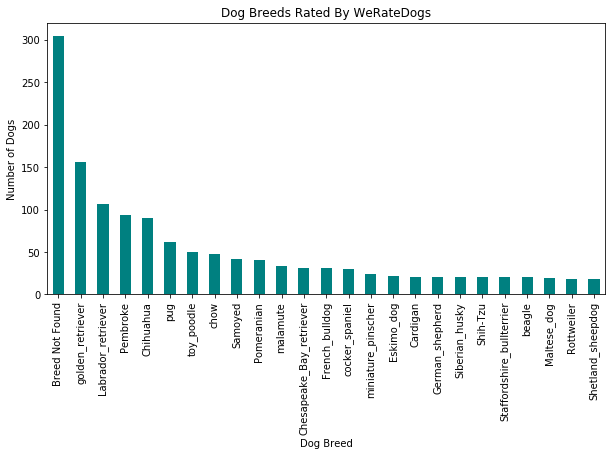

In [1713]:
import matplotlib.pyplot as plt


twitter_archive_df_clean['dog_breed_prediction'].value_counts().head(25).plot(kind='bar',figsize=(10,5),color='teal')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Dogs')
plt.title('Dog Breeds Rated By WeRateDogs')


Insight 1:
From the above bar graph, it can be seen that the top three breeds of dogs that are rated at WeRateDogs based on image predictions are:
    
    1. Golden Retriever
    2. Labrador Retriever
    3. Pembroke
    
We will exclude the first column from the bar graph since these are those dogs whose breed we could not predict.

In [1725]:
twitter_archive_df_clean.groupby(['dog_breed_prediction']).rating_numerator.mean().sort_values(ascending=False)

dog_breed_prediction
Breed Not Found                16.154098
Bouvier_des_Flandres           13.000000
Saluki                         12.500000
briard                         12.333333
Tibetan_mastiff                12.250000
Border_terrier                 12.142857
standard_schnauzer             12.000000
silky_terrier                  12.000000
Gordon_setter                  11.750000
Irish_setter                   11.750000
Samoyed                        11.690476
golden_retriever               11.548077
Australian_terrier             11.500000
wire-haired_fox_terrier        11.500000
Great_Pyrenees                 11.466667
Pembroke                       11.425532
chow                           11.416667
Eskimo_dog                     11.409091
Leonberg                       11.333333
Norfolk_terrier                11.333333
Greater_Swiss_Mountain_dog     11.333333
Doberman                       11.333333
Irish_water_spaniel            11.333333
cocker_spaniel                 11.33

Text(0.5,1,u'Mean Ratings of Top 5 Dog Breed')

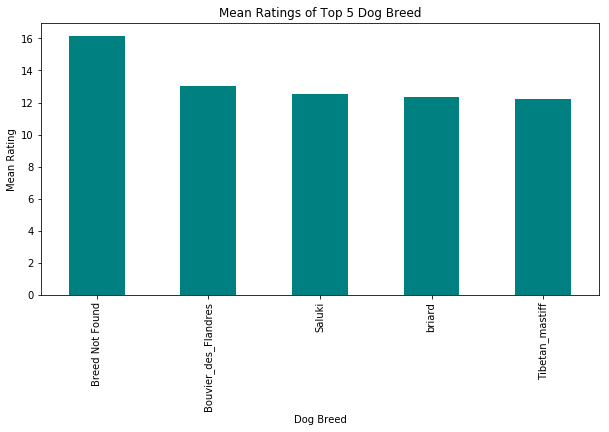

In [1777]:
# Bar Plot for Mean Rating of Top 5 Dog Breeds
twitter_archive_df_clean.groupby(['dog_breed_prediction']).rating_numerator.mean().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(10,5),color='teal')
plt.xlabel('Dog Breed')
plt.ylabel('Mean Rating')
plt.title('Mean Ratings of Top 5 Dog Breed')

Text(0.5,1,u'Mean Ratings of Bottom 5 Dog Breed')

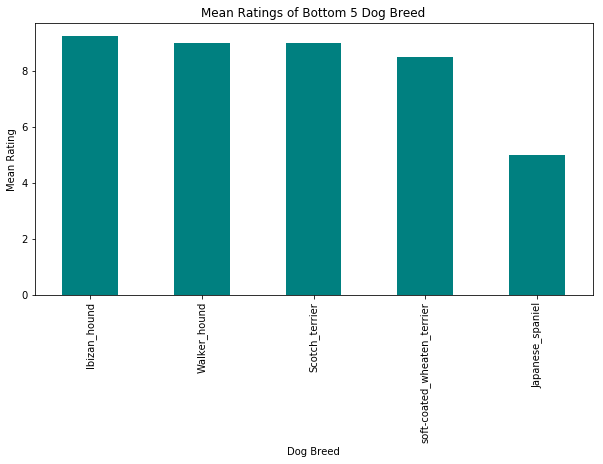

In [1776]:
# Bar Plot for Mean Rating of Bottom 5 Dog Breeds
twitter_archive_df_clean.groupby(['dog_breed_prediction']).rating_numerator.mean().sort_values(ascending=False).tail(5).plot(kind='bar',figsize=(10,5),color='teal')
plt.xlabel('Dog Breed')
plt.ylabel('Mean Rating')
plt.title('Mean Ratings of Bottom 5 Dog Breed')

Insight 2:

The dog breed that received the lowest mean rating is Japanese Spaniel and the dog breed that has the highest dog rating is Bouvier_des_Flandres and yet both these breeds have only 1 count of rating received.

In [1729]:
twitter_archive_df_clean.groupby(['dog_type']).tweet_id.count()

dog_type
Not Classified    1668
doggo             73  
floofer           7   
pupper            201 
puppo             22  
Name: tweet_id, dtype: int64

Text(0.5,1,u'Mean Rating by Dog Types')

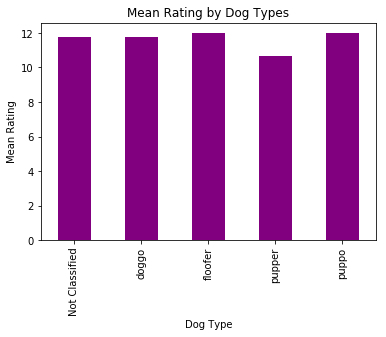

In [1750]:
twitter_archive_df_clean.groupby(['dog_type']).rating_numerator.mean().plot(kind='bar',color='purple')
plt.xlabel('Dog Type')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Dog Types')

Insight 3:
    
The dog type puppo and floofer have received the highest mean ratings while the dog type pupper has received the lowest mean ratings and we exclude the Not Classified category.

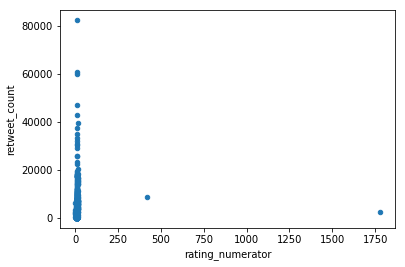

In [1759]:
twitter_archive_df_clean.plot(x='rating_numerator',y='retweet_count',kind='scatter')

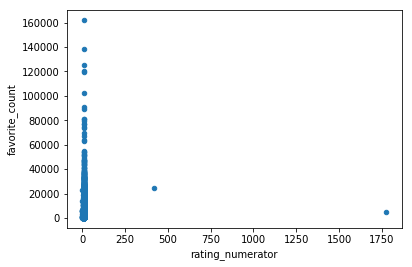

In [1755]:
twitter_archive_df_clean.plot.scatter('rating_numerator','favorite_count')

Insight 4: The tweets that receive high rating have low retweet count and favorite count.

In [1765]:
twitter_archive_df_clean.groupby('rating_numerator').tweet_id.count()

rating_numerator
0.00       2  
1.00       4  
2.00       9  
3.00       19 
4.00       15 
5.00       32 
6.00       32 
7.00       51 
8.00       95 
9.00       151
9.75       1  
10.00      419
11.00      398
11.26      1  
11.27      1  
12.00      450
13.00      254
13.50      1  
14.00      34 
420.00     1  
1776.00    1  
Name: tweet_id, dtype: int64

Insight 5: The rating that most dog tweets got was 12. 450 dogs received this rating. The next most popular rating was 10 which was given to 419 dogs. 

Sources:

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html
https://stackoverflow.com/questions/20045955/regex-pattern-in-python-for-parsing-html-title-tags
https://stackoverflow.com/questions/12788217/how-to-extract-a-single-value-from-json-response
https://www.geeksforgeeks.org/get-method-dictionaries-python/